In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import json
from itertools import chain


In [3]:
from locality.images import *
from locality.util import *
from locality.models import *

/usr0/home/naveenr/miniconda3/envs/concept-analysis/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


## Synthetic Dataset

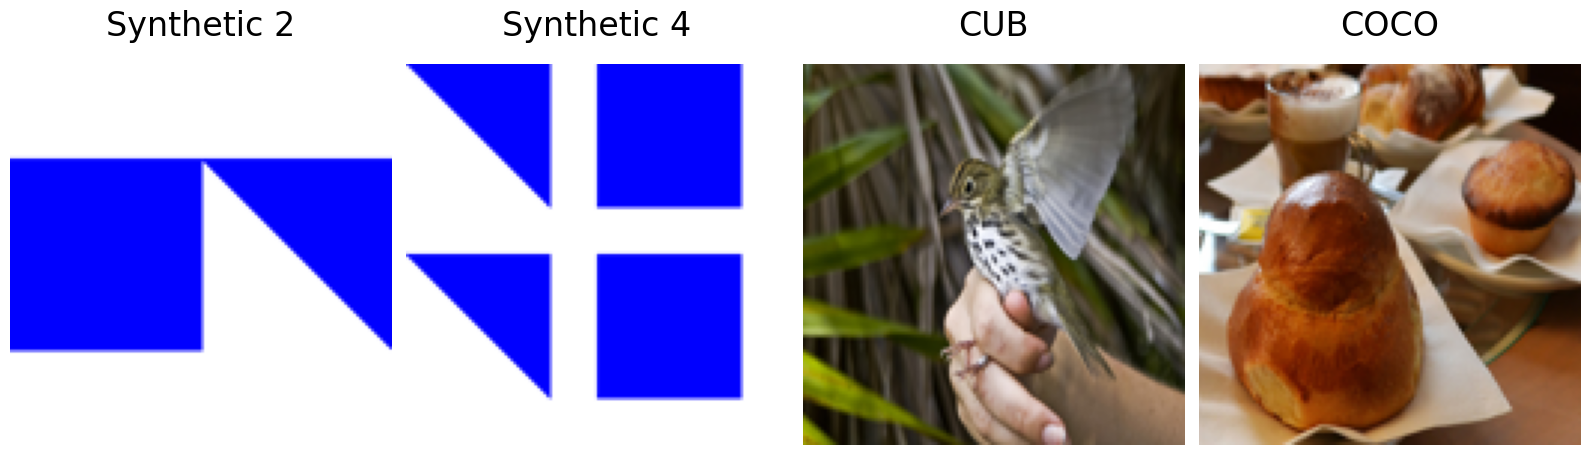

In [7]:
num_objects_list = [2,4]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(1, 4,figsize=(16, 5))

# Loop through the images and display them in the subplots
for i, num_objects in enumerate(num_objects_list):
    img_num = i+1 

    file_loc = "../../results/synthetic/objects={}_noisy=False_wd=0.0004_model=small3_optimizer=sgd_seed=42/{}.png".format(num_objects,img_num)
    img = Image.open(file_loc)
    
    # Determine the subplot position
    col = i
    img = img.resize((128,128))

    # Display the image in the appropriate subplot
    axs[col].imshow(img)
    axs[col].set_title('Synthetic {}'.format(num_objects),fontsize=24,pad=20)
    axs[col].axis('off')

file_locs = ["../../datasets/CUB/images/099.Ovenbird/Ovenbird_0137_92639.jpg","../../datasets/coco/images/train/COCO_train2014_000000124835.jpg"]
names = ["CUB","COCO"]
for i in range(len(file_locs)):
    col = i+2
    img = Image.open(file_locs[i])
    img = img.resize((128,128))
    # Display the image in the appropriate subplot
    axs[col].imshow(img)
    axs[col].set_title(names[i],fontsize=24,pad=20)
    axs[col].axis('off')

# Adjust layout
plt.tight_layout()

plt.savefig("../../results/figures/example_dataset.pdf",dpi=300, bbox_inches='tight')

# Show the grid of images
plt.show()

3262e667
2a46b8cc
8ae81be3


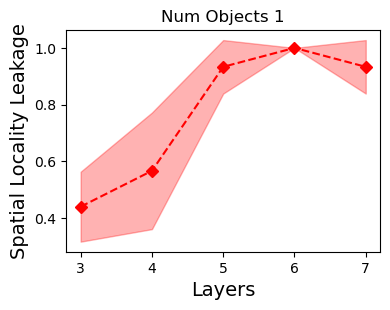

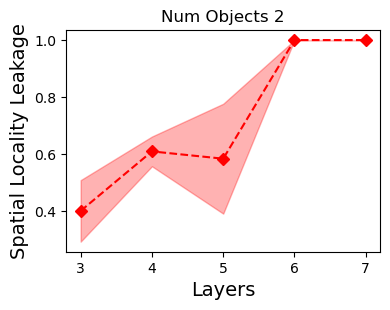

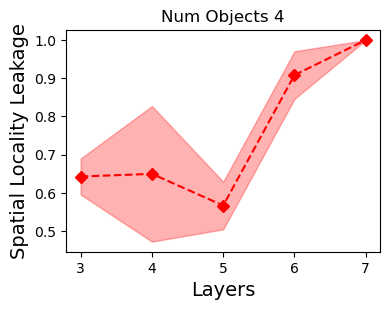

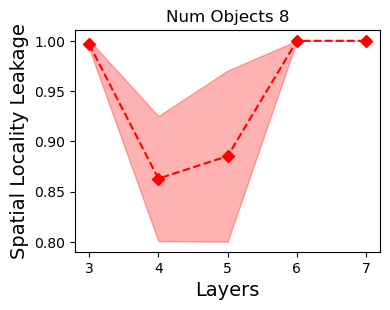

In [8]:

for num_objects in [1,2,4,8]:
    activations_by_size = [] 
    for num_layers in range(3,8):
        activations_by_size.append([])
        for seed in [42,43,44]:
            result_name = get_name_matching_parameters({'dataset': 'synthetic_object/synthetic_{}'.format(num_objects),'num_attributes': 2*num_objects,'seed': seed, 'encoder_model': 'small{}'.format(num_layers), 'epochs': 50, 'debugging': False})
            result_name = result_name[0]

            if num_layers == 3 and num_objects == 1:
                print(result_name)

            results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
            results = json.load(open(results_loc,"r"))
            activations_by_size[-1].append(np.mean(results['adversarial_activations']))

    activations_by_size = np.array(activations_by_size)
    mean_vals = np.mean(activations_by_size,axis=1)
    std_vals = np.std(activations_by_size,axis=1)

    x_vals = list(range(3,8))

    plt.figure(figsize=(4,3))

    plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.3,  color='red')
    plt.plot(x_vals, mean_vals, 'rD--')


    # Add labels, legend, and title
    plt.xlabel('Layers',fontsize=14)
    plt.ylabel('Spatial Locality Leakage',fontsize=14)

    plt.tight_layout()

    plt.title("Num Objects {}".format(num_objects))
    plt.savefig("../../results/figures/cnn_activation_{}.pdf".format(num_objects),dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

In [ ]:
result_name = get_name_matching_parameters({'dataset': 'synthetic_object/synthetic_{}'.format(2),'num_attributes': 2*2,'seed': seed, 'encoder_model': 'small{}'.format(7), 'epochs': 50, 'debugging': False})
results = [json.load(open('../../results/synthetic/{}/results.json'.format(r),"r")) for r in result_name]

In [ ]:
plt.figure(figsize=(5,4))
color_palette = plt.cm.viridis(np.linspace(0, 1, 5))
shapes = ['P','o','v','D','s']
for i,num_objects in enumerate([1,2,4,8]):
    activations_by_size = [] 
    for num_layers in range(3,8):
        activations_by_size.append([])
        for seed in [42,43,44]:
            result_name = get_name_matching_parameters({'dataset': 'synthetic_object/synthetic_{}'.format(num_objects),'num_attributes': 2*num_objects,'seed': seed, 'encoder_model': 'small{}'.format(num_layers), 'epochs': 50, 'debugging': False})
            
            result_name = result_name[0]
            results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
            results = json.load(open(results_loc,"r"))
            activations_by_size[-1].append(np.mean(results['adversarial_activations']))

    activations_by_size = np.array(activations_by_size)
    mean_vals = np.mean(activations_by_size,axis=1)
    std_vals = np.std(activations_by_size,axis=1)

    x_vals = list(range(3,8))

    plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.2,  color=color_palette[i])
    plt.plot(x_vals, mean_vals, '{}--'.format(shapes[i]),color=color_palette[i],label=str(num_objects)+"-object dataset")


    # Add labels, legend, and title
plt.xlabel('Layers',fontsize=14)
plt.ylabel('Locality Leakage',fontsize=14)
plt.yticks([0.4,0.6,0.8,1.0],fontsize=14)
plt.legend(fontsize=12)
plt.xticks([3,4,5,6,7],fontsize=14)

plt.tight_layout()

plt.savefig("../../results/figures/cnn_activation_all_objects.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
parameters_by_size = [] 

for num_layers in range(3,8):
    joint_model = get_synthetic_model("synthetic_object/synthetic_1",{'dataset': "synthetic_object/synthetic_1",'encoder_model': "small{}".format(num_layers), 'seed': 42, 'epochs': 50, 'num_attributes': 2})
    parameters_by_size.append(sum(p.numel() for p in joint_model.parameters()))

x_vals = list(range(3,8))

plt.figure(figsize=(4,3))

plt.plot(x_vals, parameters_by_size, 'rD--')


# Add labels, legend, and title
plt.xlabel('Layers',fontsize=14)
plt.ylabel('Parameters',fontsize=14)

plt.tight_layout()

plt.savefig("../../results/figures/cnn_parameters.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
num_objects = 2
activations_by_size = [] 
for num_layers in range(3,8):
    activations_by_size.append([])
    for seed in [42,43,44]:
        result_name = get_name_matching_parameters({'dataset': 'synthetic_object/synthetic_{}'.format(num_objects),'num_attributes': 2*num_objects,'seed': seed, 'encoder_model': 'small{}'.format(num_layers), 'epochs': 50, 'debugging': False, 'train_variation': 'adversarial'})
        result_name = result_name[0]
        results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
        results = json.load(open(results_loc,"r"))
        activations_by_size[-1].append(np.mean(results['adversarial_activations']))

activations_by_size = np.array(activations_by_size)
mean_vals = np.mean(activations_by_size,axis=1)
std_vals = np.std(activations_by_size,axis=1)

x_vals = list(range(3,8))

plt.figure(figsize=(4,3))

plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.3,  color='red')
plt.plot(x_vals, mean_vals, 'rD--',label="adversarial")

activations_by_size = [] 
for num_layers in range(3,8):
    activations_by_size.append([])
    for seed in [42,43,44]:
        result_name = get_name_matching_parameters({'dataset': 'synthetic_object/synthetic_{}'.format(num_objects),'num_attributes': 2*num_objects,'seed': seed, 'encoder_model': 'small{}'.format(num_layers), 'epochs': 50, 'debugging': False})
        result_name = result_name[0]
        results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
        results = json.load(open(results_loc,"r"))
        activations_by_size[-1].append(np.mean(results['adversarial_activations']))

activations_by_size = np.array(activations_by_size)
mean_vals = np.mean(activations_by_size,axis=1)
std_vals = np.std(activations_by_size,axis=1)

x_vals = list(range(3,8))

plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.3,  color='blue')
plt.plot(x_vals, mean_vals, 'bD--',label="control")



# Add labels, legend, and title
plt.xlabel('Layers',fontsize=14)
plt.ylabel('Locality Leakage',fontsize=14)
plt.legend()

plt.tight_layout()

plt.title("Num Objects {}".format(num_objects))

plt.savefig("../../results/figures/adversarial_training.pdf",dpi=300, bbox_inches='tight')


In [ ]:
num_objects = 2
activations_by_size = [] 
cem_load = [json.load(open("../../results/cem_results/cem_{}.json".format(seed))) for seed in [42,43,44]]
activations_by_size = [[np.mean(j['adversarial_activations']) for j in cem_load] for i in range(3,8)]

activations_by_size = np.array(activations_by_size)
mean_vals = np.mean(activations_by_size,axis=1)
std_vals = np.std(activations_by_size,axis=1)

x_vals = list(range(3,8))

plt.figure(figsize=(4,3))

plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.3,  color='red')
plt.plot(x_vals, mean_vals, 'r--',label="CEM")

probcbm_load = [json.load(open("../../results/probcbm_results/probcbm_{}.json".format(seed))) for seed in [1,2,3]]
activations_by_size = [[np.mean(j['adversarial_activations']) for j in probcbm_load] for i in range(3,8)]

activations_by_size = np.array(activations_by_size)
mean_vals = np.mean(activations_by_size,axis=1)
std_vals = np.std(activations_by_size,axis=1)

x_vals = list(range(3,8))

plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.3,  color='grey')
plt.plot(x_vals, mean_vals, '--',label="ProbCBM",color='orange')


activations_by_size = [] 
for num_layers in [7]:
    activations_by_size.append([])
    for seed in [42,43,44]:
        result_name = get_name_matching_parameters({'dataset': 'synthetic_object/synthetic_{}'.format(num_objects),'num_attributes': 2*num_objects,'seed': seed, 'encoder_model': 'small{}'.format(num_layers), 'epochs': 50, 'debugging': False})
        result_name = result_name[0]
        results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
        results = json.load(open(results_loc,"r"))
        activations_by_size[-1].append(np.mean(results['adversarial_activations']))

activations_by_size = np.array(activations_by_size)
mean_vals = np.mean(activations_by_size,axis=1)
std_vals = np.std(activations_by_size,axis=1)

x_vals = list(range(3,8))

plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.3,  color='blue')
plt.plot(x_vals, mean_vals, 'bD--',label="control")



# Add labels, legend, and title
plt.xlabel('Layers',fontsize=14)
plt.ylabel('Locality Leakage',fontsize=14)
plt.legend()

plt.tight_layout()

plt.title("Num Objects {}".format(num_objects))

plt.savefig("../../results/figures/cem_model.pdf",dpi=300, bbox_inches='tight')


In [ ]:
get_name_matching_parameters({'dataset': 'synthetic_object/synthetic_{}'.format(4),'num_concept_combinations': 2})

In [ ]:
num_objects = 2
activations_by_size = [] 
cem_load = [json.load(open("../../results/cem_results/cem_{}.json".format(seed))) for seed in [42,43,44]]
activations_by_size = [[np.mean(j['adversarial_activations']) for j in cem_load] for i in range(3,8)]

activations_by_size = np.array(activations_by_size)
cem_mean_vals = np.mean(activations_by_size,axis=1)
cem_std_vals = np.std(activations_by_size,axis=1)

probcbm_load = [json.load(open("../../results/probcbm_results/probcbm_{}.json".format(seed))) for seed in [1,2,3]]
activations_by_size = [[np.mean(j['adversarial_activations']) for j in probcbm_load] for i in range(3,8)]


activations_by_size = np.array(activations_by_size)
probcbm_mean_vals = np.mean(activations_by_size,axis=1)
probcbm_std_vals = np.std(activations_by_size,axis=1)


activations_by_size = [] 
for num_layers in [7]:
    activations_by_size.append([])
    for seed in [42,43,44]:
        result_name = get_name_matching_parameters({'dataset': 'synthetic_object/synthetic_{}'.format(num_objects),'num_attributes': 2*num_objects,'seed': seed, 'encoder_model': 'small{}'.format(num_layers), 'epochs': 50, 'debugging': False})
        result_name = result_name[0]
        results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
        results = json.load(open(results_loc,"r"))
        activations_by_size[-1].append((np.mean(results['adversarial_activations'])))

activations_by_size = np.array(activations_by_size)
mean_vals = np.mean(activations_by_size,axis=1)
std_vals = np.std(activations_by_size,axis=1)

latex_table = """Baseline (7 Layer) & Synthetic &                              100.0\\% $\\pm$ 0.0\%     &      {} $\\pm$ {}       & -         & -                           \\\\
CEM                & Synthetic &                           100.0\\% $\\pm$ 0.0\%          &     {} $\\pm$ {}       & -                    & -                \\\\
ProbCBM            & Synthetic &                           100.0\\% $\\pm$ 0.0\%      &         {} $\\pm$ {}        & -      & -                              \\\\
"""
print(latex_table.format("{:.3f}".format(mean_vals[0]),"{:.3f}".format(std_vals[0]),"{:.3f}".format(cem_mean_vals[0]),"{:.3f}".format(cem_std_vals[0]),"{:.3f}".format(probcbm_mean_vals[0]),"{:.3f}".format(probcbm_std_vals[0])))

In [ ]:
mean_vals

In [ ]:
plt.figure(figsize=(5,4))
color_palette = plt.cm.viridis(np.linspace(0, 1, 6))
shapes = ['P','o','v','D','s']

activations_by_size = []
for num_objects in [1,2,4,8]:
    activations_by_size.append([])
    for seed in [42,43,44]:
        result_name = get_name_matching_parameters({'dataset': 'synthetic_{}'.format(num_objects),'seed': seed,'model_type': 'probcbm', })
        result_name = result_name[0]
        results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
        results = json.load(open(results_loc,"r"))
        activations_by_size[-1].append(np.mean(results['adversarial_activations']))

activations_by_size = np.array(activations_by_size)
mean_vals = np.mean(activations_by_size,axis=1)
std_vals = np.std(activations_by_size,axis=1)

x_vals = list(range(0,4))

plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.2,  color=color_palette[0])
plt.plot(x_vals, mean_vals, shapes[0]+'--',color=color_palette[0],label='ProbCBM')

activations_by_size = []
for num_objects in [1,2,4,8]:
    activations_by_size.append([])
    for seed in [42,43,44]:
        print(num_objects,seed)
        result_name = get_name_matching_parameters({'dataset': 'synthetic_{}'.format(num_objects),'seed': seed,'model_type': 'cem'})
        result_name = result_name[0]
        results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
        results = json.load(open(results_loc,"r"))
        activations_by_size[-1].append(np.mean(results['adversarial_activations']))

activations_by_size = np.array(activations_by_size)
mean_vals = np.mean(activations_by_size,axis=1)
std_vals = np.std(activations_by_size,axis=1)

x_vals = list(range(0,4))

plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.2,  color=color_palette[3])
plt.plot(x_vals, mean_vals, shapes[4]+'--',color=color_palette[4],label='CEM')


    # Add labels, legend, and title
plt.xlabel('Datast Objects',fontsize=14)
plt.ylabel('Locality Leakage',fontsize=14)
plt.yticks([0.4,0.6,0.8,1.0],fontsize=14)
plt.ylim([0.3,1.0])
plt.legend(fontsize=12)
plt.xticks(x_vals,[1,2,4,8],fontsize=14)

plt.tight_layout()

plt.savefig("../../results/figures/cem_probcbm.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
for num_layers in range(3,8):

    activations_by_size = [] 
    for num_objects in [1,2,4,8]:
        activations_by_size.append([])
        for seed in [42,43,44]:
            result_name = get_name_matching_parameters({'dataset': 'synthetic_object/synthetic_{}'.format(num_objects),'num_attributes': 2*num_objects,'seed': seed, 'encoder_model': 'small{}'.format(num_layers), 'epochs': 50, 'debugging': False})
            result_name = result_name[0]
            results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
            results = json.load(open(results_loc,"r"))
            activations_by_size[-1].append(np.mean(results['adversarial_activations']))

    activations_by_size = np.array(activations_by_size)
    mean_vals = np.mean(activations_by_size,axis=1)
    std_vals = np.std(activations_by_size,axis=1)

    x_vals = list(range(0,4))

    plt.figure(figsize=(4,3))

    plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.3,  color='red')
    plt.plot(x_vals, mean_vals, 'rD--')


    # Add labels, legend, and title
    plt.xlabel('Dataset Objects',fontsize=14)
    plt.ylabel('Spatial Locality Leakage',fontsize=14)
    plt.xticks(x_vals,[1,2,4,8])

    plt.tight_layout()

    plt.title("{} layer model".format(num_layers))
    plt.savefig("../../results/figures/cnn_activation_nobjects_{}.pdf".format(num_layers),dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

In [ ]:
plt.figure(figsize=(5,4))
color_palette = plt.cm.viridis(np.linspace(0, 1, 6))
shapes = ['P','o','v','D','s']

for i,num_layers in enumerate(range(3,8)):

    activations_by_size = [] 
    for num_objects in [1,2,4,8]:
        activations_by_size.append([])
        for seed in [42,43,44]:
            result_name = get_name_matching_parameters({'dataset': 'synthetic_object/synthetic_{}'.format(num_objects),'num_attributes': 2*num_objects,'seed': seed, 'encoder_model': 'small{}'.format(num_layers), 'epochs': 50, 'debugging': False})
            result_name = result_name[0]
            results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
            results = json.load(open(results_loc,"r"))
            if num_layers == 5:
                print(np.mean(results['adversarial_activations']),num_objects,seed)
            activations_by_size[-1].append(np.mean(results['adversarial_activations']))

    activations_by_size = np.array(activations_by_size)
    mean_vals = np.mean(activations_by_size,axis=1)
    std_vals = np.std(activations_by_size,axis=1)

    x_vals = list(range(0,4))

    plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.2,  color=color_palette[i])
    plt.plot(x_vals, mean_vals, '{}--'.format(shapes[i]),color=color_palette[i],label=str(num_layers)+" layer")


    # Add labels, legend, and title
plt.xlabel('Datast Objects',fontsize=14)
plt.ylabel('Locality Leakage',fontsize=14)
plt.yticks([0.4,0.6,0.8,1.0],fontsize=14)
plt.legend(fontsize=12)
plt.xticks(x_vals,[1,2,4,8],fontsize=14)

plt.tight_layout()

plt.savefig("../../results/figures/cnn_activation_all_layers.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
for num_layers in range(3,8):
    activations_by_size = [] 
    for num_objects in [1,2,4]:
        activations_by_size.append([])
        for seed in [42,43,44]:
            result_name = get_name_matching_parameters({'dataset': 'synthetic_object/synthetic_{}_noisy'.format(num_objects),'num_attributes': 2*num_objects,'seed': seed, 'encoder_model': 'small{}'.format(num_layers), 'epochs': 50, 'debugging': False})
            result_name = result_name[0]
            results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
            results = json.load(open(results_loc,"r"))
            activations_by_size[-1].append(np.mean(results['adversarial_activations']))

    activations_by_size = np.array(activations_by_size)
    mean_vals = np.mean(activations_by_size,axis=1)
    std_vals = np.std(activations_by_size,axis=1)

    x_vals = list(range(0,3))

    plt.figure(figsize=(4,3))

    plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.3,  color='red')
    plt.plot(x_vals, mean_vals, 'rD--')


    # Add labels, legend, and title
    plt.xlabel('Dataset Objects',fontsize=14)
    plt.ylabel('Spatial Locality Leakage',fontsize=14)
    plt.xticks(x_vals,[1,2,4])

    plt.tight_layout()

    plt.title("Num Layers {} Noisy".format(num_layers))
    plt.savefig("../../results/figures/cnn_activation_nobjects_{}.pdf".format(num_layers),dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

In [ ]:
plt.figure(figsize=(5,4))
color_palette = plt.cm.viridis(np.linspace(0, 1, 4))
for i,num_objects in enumerate([1,2,4]):
    activations_by_size = [] 
    for num_layers in range(3,8):
        activations_by_size.append([])
        for seed in [42,43,44]:
            result_name = get_name_matching_parameters({'dataset': 'synthetic_object/synthetic_{}_noisy'.format(num_objects),'num_attributes': 2*num_objects,'seed': seed, 'encoder_model': 'small{}'.format(num_layers), 'epochs': 50, 'debugging': False})
            result_name = result_name[0]
            results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
            results = json.load(open(results_loc,"r"))
            activations_by_size[-1].append(np.mean(results['adversarial_activations']))

    activations_by_size = np.array(activations_by_size)
    mean_vals = np.mean(activations_by_size,axis=1)
    std_vals = np.std(activations_by_size,axis=1)

    x_vals = list(range(3,8))

    plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.2,  color=color_palette[i])
    plt.plot(x_vals, mean_vals, 'D--',color=color_palette[i],label=str(num_objects)+"-object dataset")


    # Add labels, legend, and title
plt.xlabel('Layers',fontsize=14)
plt.ylabel('Locality Leakage',fontsize=14)
plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=14)
plt.legend(fontsize=14)
plt.xticks([3,4,5,6,7],fontsize=14)

plt.tight_layout()

plt.savefig("../../results/figures/cnn_activation_all_objects_noisy.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
for num_objects in [1,2,4]:
    activations_by_size = [] 
    for num_layers in range(3,8):
        activations_by_size.append([])
        for seed in [42,43,44]:
            result_name = get_name_matching_parameters({'dataset': 'synthetic_object/synthetic_{}_noisy'.format(num_objects),'num_attributes': 2*num_objects,'seed': seed, 'encoder_model': 'small{}'.format(num_layers), 'epochs': 50, 'debugging': False})
            result_name = result_name[0]
            results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
            results = json.load(open(results_loc,"r"))
            activations_by_size[-1].append(np.mean(results['adversarial_activations']))

    activations_by_size = np.array(activations_by_size)
    mean_vals = np.mean(activations_by_size,axis=1)
    std_vals = np.std(activations_by_size,axis=1)

    x_vals = list(range(3,8))

    plt.figure(figsize=(4,3))

    plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.3,  color='red')
    plt.plot(x_vals, mean_vals, 'rD--')


    # Add labels, legend, and title
    plt.xlabel('Model Size',fontsize=14)
    plt.ylabel('Spatial Locality Leakage',fontsize=14)
    plt.xticks(x_vals,fontsize=14)

    plt.tight_layout()

    plt.title("{} objects Noisy".format(num_objects))
    plt.savefig("../../results/figures/cnn_activation_nobjects_noisy_{}.pdf".format(num_objects),dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

### Impact of Regularization

In [ ]:
all_json = [json.load(open("../../results/synthetic/l2_norm/results_{}.json".format(seed))) for seed in [42,43,44]]
all_activation = [i['activation_values'] for i in all_json]
lamb_vals = all_json[0]['lambda']
all_activation = np.array(all_activation)
all_activation_mean = np.mean(all_activation,axis=0)
all_activation_std = np.std(all_activation,axis=0)

x_vals = list(range(len(lamb_vals)))

plt.figure(figsize=(4,3))

plt.fill_between(x_vals, all_activation_mean - all_activation_std, all_activation_mean + all_activation_std, alpha=0.3,  color='blue')
plt.plot(x_vals, all_activation_mean, 'bD--')


# Add labels, legend, and title
plt.xlabel('Regularization Penalty',fontsize=14)
plt.ylabel('Locality Leakage',fontsize=14)
plt.xticks(x_vals,lamb_vals,fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig("../../results/figures/regularization_sll.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
file_loc = "../../results/synthetic/l2_norm/example_4_42.png"
img = Image.open(file_loc)
img

### Impact of Training Epochs

In [ ]:
activations_by_size = [] 
accuracy_by_size = []
for epochs in [5,10,20,30,40,50]:
    activations_by_size.append([])
    accuracy_by_size.append([])
    for seed in [42,43,44]:
        result_name = get_name_matching_parameters({'dataset': 'synthetic_object/synthetic_2','num_attributes': 4,'seed': seed, 'encoder_model': 'small7', 'epochs': epochs, 'debugging': False})
        result_name = result_name[0]
        results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
        results = json.load(open(results_loc,"r"))
        activations_by_size[-1].append(np.mean(results['adversarial_activations']))
        accuracy_by_size[-1].append(results['test_accuracy'])

activations_by_size = np.array(activations_by_size)
mean_vals = np.mean(activations_by_size,axis=1)
std_vals = np.std(activations_by_size,axis=1)

accuracy_by_size = np.array(accuracy_by_size)
mean_accuracy = np.mean(accuracy_by_size,axis=1)
std_accuracy = np.std(accuracy_by_size,axis=1)


x_vals = list(range(0,6))

plt.figure(figsize=(4,3))

plt.fill_between(x_vals, mean_accuracy - std_accuracy, mean_accuracy + std_accuracy, alpha=0.3,  color='red')
plt.plot(x_vals, mean_accuracy, 'rD--',label='Accuracy')


plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, alpha=0.3,  color='blue')
plt.plot(x_vals, mean_vals, 'bD--',label='Leakage')



# Add labels, legend, and title
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Locality Leakage',fontsize=14)
plt.xticks(x_vals,[5,10,20,30,40,50],fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14,loc='lower right')

plt.tight_layout()

plt.savefig("../../results/figures/cnn_activation_epochs.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Impact of Model Size

In [ ]:
seeds = [42,43,44]
num_layers = 1
accuracy_values = []
leakage_values = []
for depth in [3,4,5,6,7]:
    accuracy_values.append([])
    leakage_values.append([])

    for seed in seeds:
        d = {'dataset': 'synthetic_object/synthetic_{}'.format(1),'num_attributes': 2,'seed': seed, 'encoder_model': 'equal_parameter{}'.format(depth) }
        if depth == 7:
            d['lr'] = 0.1
        result_name = get_name_matching_parameters(d)
        result_name = result_name[0]
        results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
        results = json.load(open(results_loc,"r"))

        accuracy_values[-1].append(results['test_accuracy'])
        leakage_values[-1].append(np.mean(results['adversarial_activations']))

accuracy_values = np.array(accuracy_values).T
leakage_values = np.array(leakage_values).T

mean_accuracy = np.mean(accuracy_values,axis=0)
std_accuracy = np.std(accuracy_values,axis=0)

mean_leakage = np.mean(leakage_values,axis=0)
std_leakage = np.std(leakage_values,axis=0)

x_vals = [3,4,5,6,7]

plt.figure(figsize=(4,3))

plt.fill_between(x_vals, mean_accuracy - std_accuracy, mean_accuracy + std_accuracy, alpha=0.3, label="Accuracy", color='red')
plt.plot(x_vals, mean_accuracy, 'rD--')

plt.fill_between(x_vals, mean_leakage - std_leakage, mean_leakage + std_leakage, alpha=0.3, label="Leakage", color='blue')
plt.plot(x_vals, mean_leakage, 'bD--')

# Add labels, legend, and title
plt.xlabel('Model Depth',fontsize=14)
plt.ylabel('Metric',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right') 
plt.tight_layout()

plt.savefig("../../results/figures/cnn_parameters_fixed.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

#### Receptive Field Analysis

In [ ]:
seeds = [42,43,44]
num_layers = 1
accuracy_values = []
leakage_values = []
for depth in [3,4,5,6,7]:
    accuracy_values.append([])
    leakage_values.append([])

    for seed in seeds:
        d = {'dataset': 'synthetic_object/synthetic_{}'.format(1),'num_attributes': 2,'seed': seed, 'encoder_model': 'receptive_field{}'.format(depth) }
        if depth == 7:
            d['lr'] = 0.1
        result_name = get_name_matching_parameters(d)
        result_name = result_name[0]
        results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
        results = json.load(open(results_loc,"r"))

        accuracy_values[-1].append(results['test_accuracy'])
        leakage_values[-1].append(np.mean(results['adversarial_activations']))

accuracy_values = np.array(accuracy_values).T
leakage_values = np.array(leakage_values).T

mean_accuracy = np.mean(accuracy_values,axis=0)
std_accuracy = np.std(accuracy_values,axis=0)

mean_leakage = np.mean(leakage_values,axis=0)
std_leakage = np.std(leakage_values,axis=0)

x_vals = [3,4,5,6,7]

plt.figure(figsize=(4,3))

plt.fill_between(x_vals, mean_accuracy - std_accuracy, mean_accuracy + std_accuracy, alpha=0.3, label="Accuracy", color='red')
plt.plot(x_vals, mean_accuracy, 'rD--')

plt.fill_between(x_vals, mean_leakage - std_leakage, mean_leakage + std_leakage, alpha=0.3, label="Leakage", color='blue')
plt.plot(x_vals, mean_leakage, 'bD--')

# Add labels, legend, and title
plt.xlabel('Model Depth',fontsize=14)
plt.ylabel('Metric',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right') 
plt.tight_layout()

plt.savefig("../../results/figures/receptive_field.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
seeds = [42,43,44]
num_layers = 1
accuracy_values = []
leakage_values = []
for depth in [3,4,5,6,7]:
    accuracy_values.append([])
    leakage_values.append([])

    for seed in seeds:
        d = {'dataset': 'synthetic_object/synthetic_{}'.format(1),'num_attributes': 2,'seed': seed, 'encoder_model': 'small{}'.format(depth), 'use_residual': True }
        result_name = get_name_matching_parameters(d)
        result_name = result_name[0]
        results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
        results = json.load(open(results_loc,"r"))
        accuracy_values[-1].append(results['test_accuracy'])
        leakage_values[-1].append(np.mean(results['adversarial_activations']))

accuracy_values = np.array(accuracy_values).T
leakage_values = np.array(leakage_values).T

mean_accuracy = np.mean(accuracy_values,axis=0)
std_accuracy = np.std(accuracy_values,axis=0)

mean_leakage = np.mean(leakage_values,axis=0)
std_leakage = np.std(leakage_values,axis=0)

x_vals = [3,4,5,6,7]

plt.figure(figsize=(4,3))

plt.fill_between(x_vals, mean_accuracy - std_accuracy, mean_accuracy + std_accuracy, alpha=0.3, label="Accuracy", color='red')
plt.plot(x_vals, mean_accuracy, 'rD--')

plt.fill_between(x_vals, mean_leakage - std_leakage, mean_leakage + std_leakage, alpha=0.3, label="Leakage", color='blue')
plt.plot(x_vals, mean_leakage, 'bD--')

# Add labels, legend, and title
plt.xlabel('Model Depth',fontsize=14)
plt.ylabel('Metric',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right') 
plt.tight_layout()

plt.savefig("../../results/figures/residual.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
seeds = [42,43,44]
num_layers = 1
accuracy_values = []
leakage_values = []
for depth in [3,4,5,6,7]:
    accuracy_values.append([])
    leakage_values.append([])

    for seed in seeds:
        d = {'dataset': 'synthetic_object/synthetic_{}'.format(1),'num_attributes': 2,'seed': seed, 'encoder_model': 'equal_parameter{}'.format(depth) }
        if depth == 7:
            d['lr'] = 0.1
        result_name = get_name_matching_parameters(d)
        result_name = result_name[0]
        results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
        results = json.load(open(results_loc,"r"))

        accuracy_values[-1].append(results['test_accuracy'])
        leakage_values[-1].append(np.mean(results['adversarial_activations']))

accuracy_values = np.array(accuracy_values).T
leakage_values = np.array(leakage_values).T

mean_accuracy = np.mean(accuracy_values,axis=0)
std_accuracy = np.std(accuracy_values,axis=0)

mean_leakage = np.mean(leakage_values,axis=0)
std_leakage = np.std(leakage_values,axis=0)

receptive_fields = [13,15,17,19,21]
x_vals = receptive_fields 

plt.figure(figsize=(4,3))

plt.fill_between(x_vals, mean_accuracy - std_accuracy, mean_accuracy + std_accuracy, alpha=0.3, label="Accuracy", color='red')
plt.plot(x_vals, mean_accuracy, 'rD--')

plt.fill_between(x_vals, mean_leakage - std_leakage, mean_leakage + std_leakage, alpha=0.3, label="Leakage", color='blue')
plt.plot(x_vals, mean_leakage, 'bD--')

# Add labels, legend, and title
plt.xlabel('Receptive Field Size',fontsize=14)
plt.ylabel('Metric',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right') 
plt.tight_layout()

plt.savefig("../../results/figures/cnn_parameters_receptive.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
seeds = [42,43,44]
num_layers = 1
accuracy_values = []
leakage_values = []
for weight_decay in [0.04,0.004,0.0004][::-1]:
    accuracy_values.append([])
    leakage_values.append([])

    for seed in seeds:
        result_name = get_name_matching_parameters({'dataset': 'synthetic_object/synthetic_{}'.format(2),'num_attributes': 4,'seed': seed, 'encoder_model': 'small7','weight_decay': weight_decay })
        result_name = result_name[0]
        results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
        results = json.load(open(results_loc,"r"))

        accuracy_values[-1].append(results['test_accuracy'])
        leakage_values[-1].append(np.mean(results['adversarial_activations']))

accuracy_values = np.array(accuracy_values).T
leakage_values = np.array(leakage_values).T

mean_accuracy = np.mean(accuracy_values,axis=0)
std_accuracy = np.std(accuracy_values,axis=0)

mean_leakage = np.mean(leakage_values,axis=0)
std_leakage = np.std(leakage_values,axis=0)

x_vals = [1,2,3]

plt.figure(figsize=(4,3))

plt.fill_between(x_vals, mean_accuracy - std_accuracy, mean_accuracy + std_accuracy, alpha=0.3, label="Accuracy", color='red')
plt.plot(x_vals, mean_accuracy, 'rD--')

plt.fill_between(x_vals, mean_leakage - std_leakage, mean_leakage + std_leakage, alpha=0.3, label="Leakage", color='blue')
plt.plot(x_vals, mean_leakage, 'bD--')

plt.xticks(x_vals,[0.04,0.004,0.0004][::-1],fontsize=14)
plt.yticks(fontsize=14)

# Add labels, legend, and title
plt.xlabel('Weight Decay',fontsize=14)
plt.ylabel('Metric',fontsize=14)
plt.legend() 
plt.tight_layout()

plt.savefig("../../results/figures/cnn_weight_decay.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### MLP Results

In [ ]:
results_matrix = [[["" for k in range(2)] for i in range(3)] for j in range(3)]

for i,num_layers in enumerate([1,2,3]):
    for j,model_size in enumerate([5,10,15]):
        activation_list = []

        for seed in [42,43,44]:
            result_name = get_name_matching_parameters({'num_attributes': 2,'seed': seed, 'encoder_model': 'mlp', 'num_middle_encoder': num_layers, 'expand_dim_encoder': model_size })
            result_name = result_name[0]
            results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
            results = json.load(open(results_loc,"r"))
            activation_list.append(min(results['adversarial_activations']))

        results_matrix[i][j][0] = str("{:.2f}".format(np.mean(activation_list)))
        results_matrix[i][j][1] = str("{:.2f}".format(np.std(activation_list)))

latex_table = """\\begin{{table}}[]
\\begin{{tabular}}{{@{{}}lll@{{}}}}
\centering 
\\toprule
Depth & Width & Activation \\\\ \\midrule
1     & 5     & {} $\\pm$ {}       \\\\
      & 10    & {} $\\pm$ {}        \\\\
      & 15    & {} $\\pm$ {}        \\\\ 
2     & 5     & {} $\\pm$ {}        \\\\
      & 10    & {} $\\pm$ {}        \\\\
      & 15    & {} $\\pm$ {}        \\\\
3     & 5     & {} $\\pm$ {}        \\\\
      & 10    & {} $\\pm$ {}        \\\\
      & 15    & {} $\\pm$ {}        \\\\ \\bottomrule 
\\end{{tabular}}
\\caption{{Activation results by MLP model Depth and Width. We see that, with increasing width, MLP models have increasingly large activations. However, contrary to intuitions, increasing width has no clear pattern.}}
\\end{{table}}""".format(*chain.from_iterable(list(chain.from_iterable(results_matrix))))

print(latex_table)

## Independent Models

In [ ]:
seeds = [42,43,44]

accuracy_values = []
leakage_values = []

for seed in seeds:
    result_name = get_name_matching_parameters({'model_type': 'independent', 'seed': seed,'debugging': False})
    result_name = result_name[0]
    results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
    results = json.load(open(results_loc,"r"))
    
    leakage_values.append(np.mean(results['adversarial_activations']))
    accuracy_values.append(results['test_accuracy'])

plt.figure(figsize=(4,3))
all_data = [accuracy_values,leakage_values]
plt.boxplot(all_data, labels=['Accuracy', 'Leakage'])
plt.xticks(fontsize=14)
plt.yticks([0.96,1.0,1.04],fontsize=14)


plt.xlabel('Metric',fontsize=14)
plt.ylabel('Accuracy/Leakage',fontsize=14)
plt.tight_layout()

plt.savefig("../../results/figures/independent_models.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
seeds = [42,43,44]

accuracy_values = []
leakage_values = []

for seed in seeds:
    result_name = get_name_matching_parameters({"dataset": "synthetic_object/synthetic_2", "model_type": "independent", "num_attributes": 4, "num_classes": 2, "seed": seed, "epochs": 50,  "encoder_model": "small7", "weight_decay": 0.0004, "attr_loss_weight": 1.0, "optimizer": "sgd", "expand_dim_encoder": 0, "num_middle_encoder": 0, "load_model": "none", "train_variation": "none", "debugging": False})#, "scale_lr": 5, "scale_factor": 1.5})
    print(result_name)
    result_name = result_name[0]
    results_loc = '../../results/synthetic/{}/results.json'.format(result_name,seed)
    results = json.load(open(results_loc,"r"))
    
    leakage_values.append(np.mean(results['adversarial_activations']))
    accuracy_values.append(results['test_accuracy'])

plt.figure(figsize=(4,3))
all_data = [accuracy_values,leakage_values]
plt.boxplot(all_data, labels=['Accuracy', 'Leakage'])
plt.xticks(fontsize=14)
plt.yticks([0.96,1.0,1.04],fontsize=14)


plt.xlabel('Metric',fontsize=14)
plt.ylabel('Accuracy/Leakage',fontsize=14)
plt.tight_layout()

plt.savefig("../../results/figures/independent_models.pdf",dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Synthetic Interventions

In [ ]:
results = glob.glob("../../results/correlation/*.json")
all_json = [json.load(open(i)) for i in results]
keys = sorted(list(set([i['parameters']['num_concept_combinations'] for i in all_json])))
all_std = [np.std([i['out_distro'] for i in all_json if i['parameters']['num_concept_combinations'] == key]) for key in keys]
all_json = [np.mean([i['out_distro'] for i in all_json if i['parameters']['num_concept_combinations'] == key]) for key in keys]

all_json = np.array(all_json)
all_std = np.array(all_std)

plt.figure(figsize=(3,3))
plt.plot([key/16 for key in keys],all_json)
plt.yticks([0.5,0.75,1],["50%","75%","100%"],fontsize=14)
plt.xticks([0,0.25,0.5,0.75,1],["0%","25%","50%","75%","100%"],fontsize=14)
plt.xlim([0,1])
plt.ylabel("Unseen Concept Combination Acc.",fontsize=14)
plt.fill_between([key/16 for key in keys], all_json - all_std, all_json + all_std, alpha=0.2)

plt.xlabel("% Concept Combinations",fontsize=14)
plt.savefig("../../results/figures/correlations.pdf",dpi=300, bbox_inches='tight')


In [ ]:
results = glob.glob("../../results/correlation/*.json")
all_json = [json.load(open(i)) for i in results]
keys = sorted(list(set([i['parameters']['num_concept_combinations'] for i in all_json])))
all_std = [np.std([np.mean(i['concept_accuracies']) for i in all_json if i['parameters']['num_concept_combinations'] == key and 'concept_accuracies' in i]) for key in keys]

all_json = [1-np.mean([np.mean(i['concept_accuracies']) for i in all_json if i['parameters']['num_concept_combinations'] == key  and 'concept_accuracies' in i]) for key in keys]
all_json = np.array(all_json)
all_std = np.array(all_std)

plt.figure(figsize=(3,3))
plt.plot([key/16 for key in keys],all_json)
plt.fill_between([key/16 for key in keys], all_json - all_std, all_json + all_std, alpha=0.2)
plt.yticks([0,0.25,0.5],["0%","25%","50%"],fontsize=14)
plt.xticks([0,0.25,0.5,0.75,1],["0%","25%","50%","75%","100%"],fontsize=14)
plt.ylabel("Locality Intervention",fontsize=14)
plt.xlabel("% Concept Combinations",fontsize=14)
plt.savefig("../../results/figures/correlations_flipped.pdf",dpi=300, bbox_inches='tight')


In [ ]:
results = glob.glob("../../results/correlation/*.json")
all_json = [json.load(open(i)) for i in results]
keys = sorted(list(set([i['parameters']['num_concept_combinations'] for i in all_json])))
all_std = [np.std([i['adversarial_activations'] for i in all_json if i['parameters']['num_concept_combinations'] == key]) for key in keys]

all_json = [np.mean([i['adversarial_activations'] for i in all_json if i['parameters']['num_concept_combinations'] == key]) for key in keys]
all_json = np.array(all_json)
all_std = np.array(all_std)

plt.figure(figsize=(3,3))
plt.plot([key/16 for key in keys],all_json,label="Leakage")


all_json = [json.load(open(i)) for i in results]
all_std = [np.std([i['concept_accuracies'] for i in all_json if i['parameters']['num_concept_combinations'] == key]) for key in keys]
all_std = np.array(all_std)
all_json = [np.mean([i['concept_accuracies'] for i in all_json if i['parameters']['num_concept_combinations'] == key]) for key in keys]
all_json = np.array(all_json)
plt.plot([key/16 for key in keys],all_json,label="Concept Accuracy")


plt.fill_between([key/16 for key in keys], all_json - all_std, all_json + all_std, alpha=0.2)
plt.yticks([0,0.25,0.5,0.75,1],["0%","25%","50%","75%","100%"],fontsize=14)
plt.xticks([0,0.25,0.5,0.75,1],["0%","25%","50%","75%","100%"],fontsize=14)
plt.ylabel("Metric",fontsize=14)
plt.xlabel("% Concept Combinations",fontsize=14)
plt.legend()
plt.savefig("../../results/figures/avg_adversarial.pdf",dpi=300, bbox_inches='tight')


In [ ]:
results_loc = '../../results/cub/mask_epsilon_42.json'
results = json.load(open(results_loc))
results

In [ ]:
plt.figure(figsize=(3,3))

for dataset,concept_nums in zip(["CUB","coco"],[[0,50,100,150,200],[0,16,32,48,64]]):
    locality_levels = []
    stds = []
    for i in concept_nums:
        if i == 0:
            if dataset == 'CUB':
                locality_levels.append(0.1830172222496178)
                stds.append(0)
            else:
                locality_levels.append(0.2046208530805687)
                stds.append(0)
        else:
            results = get_name_matching_parameters({'dataset_name': dataset, 'num_concept_combinations': i},folder_name='results/correlation')
            all_results = []
            for a in results:
                all_results.append(json.load(open("../../results/correlation/{}.json".format(a)))['locality_intervention'])
            locality_levels.append(np.mean(all_results))
            stds.append(np.std(all_results))
            print(dataset,i,len(all_results))
    print(locality_levels)

    plt.plot([0,0.25,0.5,0.75,1],locality_levels,label=dataset.upper())
    plt.fill_between([0,0.25,0.5,0.75,1], np.array(locality_levels) - np.array(stds), np.array(locality_levels) + np.array(stds), alpha=0.2)
plt.yticks([0,0.1,0.2,0.3],["0%","10%","20%","30%"],fontsize=14)
plt.xticks([0,0.25,0.5,0.75,1],["0%","25%","50%","75%","100%"],fontsize=14)
plt.ylabel("Locality Intervention",fontsize=14)
plt.xlabel("% Concept Combinations",fontsize=14)
plt.legend()
plt.savefig("../../results/figures/cub_coco_intervention.pdf",dpi=300, bbox_inches='tight')



## CUB

In [ ]:
def get_avg(results_by_part_mask):
    vals = []
    for i in results_by_part_mask:
        for j in results_by_part_mask[i]:
            if i!=j:
                vals.append(results_by_part_mask[i][j][0])
    return np.mean(vals) 

In [ ]:
def get_avg_part_part(results_by_part_mask):
    vals = []
    for i in results_by_part_mask:
        for j in results_by_part_mask[i]:
            if i==j:
                vals.append(results_by_part_mask[i][j][0])
    return np.mean(vals) 

In [ ]:
seeds = [42,43,44]

seed = 42
result_name = "../../results/cub/mask_epsilon_{}.json".format(seed)
results = json.load(open(result_name))
part_names = sorted(list(results['part_mask'].keys()))
inference_by_part = np.zeros((len(part_names),len(part_names)))
for seed in [42,43,44]:
    result_name = "../../results/cub/mask_epsilon_{}.json".format(seed)
    results = json.load(open(result_name))
    part_names_2 = sorted(results['part_mask'].keys())

    for i,p_1 in enumerate(part_names):
        for j,p_2 in enumerate(part_names):
            if p_2 in results['part_mask'][p_1]:
                print(i,j)
                inference_by_part[i,j] += results['part_mask'][p_1][p_2][0] 

inference_by_part /= len(seeds)
part_names_nice = [i.capitalize() for i in part_names]
sns.heatmap(inference_by_part,xticklabels=part_names_nice,yticklabels=part_names_nice)
plt.xlabel("Masking Part",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Main Part",fontsize=14)
plt.savefig("../../results/figures/cub_heatmap.pdf",dpi=300, bbox_inches='tight')


In [ ]:
seeds = [42,43,44]

seed = 42
result_name = "../../results/cub/mask_epsilon_mean_color_{}.json".format(seed)
results = json.load(open(result_name))
part_names = sorted(list(results['part_mask'].keys()))
inference_by_part = np.zeros((len(part_names),len(part_names)))
for seed in [42,43,44]:
    result_name = "../../results/cub/mask_epsilon_mean_color_{}.json".format(seed)
    results = json.load(open(result_name))
    part_names_2 = sorted(results['part_mask'].keys())

    for i,p_1 in enumerate(part_names):
        for j,p_2 in enumerate(part_names):
            if p_2 in results['part_mask'][p_1]:
                print(i,j)
                inference_by_part[i,j] += results['part_mask'][p_1][p_2][0] 

inference_by_part /= len(seeds)
part_names_nice = [i.capitalize() for i in part_names]
sns.heatmap(inference_by_part,xticklabels=part_names_nice,yticklabels=part_names_nice)
plt.xlabel("Masking Part",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Main Part",fontsize=14)
plt.savefig("../../results/figures/cub_mean_heatmap.pdf",dpi=300, bbox_inches='tight')


## Table Comparison

In [ ]:
seeds = [42,43,44]

variation_list = ["none","label-free","cub_cem","cub_probcbm","coco_none","coco_cem","coco_probcbm"]

accuracy_variation = []
relevant_variation = []
irrelevant_variation = []

for seed in seeds:
    accuracy_variation.append([])
    relevant_variation.append([])
    irrelevant_variation.append([])

    for variation in variation_list:
        if 'coco' in variation:
            variation = variation.split("_")
            if variation[1] == 'none':
                results_loc = '../../results/coco/mask_none_{}.json'.format(seed)
            else:
                results_loc = '../../results/{}/mask_{}_{}.json'.format(variation[0],variation[1],seed)
        elif 'cub' in variation: 
            variation = variation.split("_")
            results_loc = '../../results/cub/mask_epsilon_mean_color_{}_{}.json'.format(seed,variation[1])
        elif variation != "none":
            results_loc = '../../results/cub/mask_epsilon_{}_{}.json'.format(variation,seed)
        else:
            results_loc = '../../results/cub/mask_epsilon_{}.json'.format(seed)
        results = json.load(open(results_loc,"r"))

        if variation == 'label-free':
            results['test_acc'] = 0.7458

        accuracy_variation[-1].append(results['test_acc'])
        relevant_variation[-1].append(get_avg_part_part(results['part_mask']))
        irrelevant_variation[-1].append(get_avg(results['part_mask']))
    
accuracy_variation = np.array(accuracy_variation)
relevant_variation = np.array(relevant_variation)
irrelevant_variation = np.array(irrelevant_variation)

mean_accuracy = np.mean(accuracy_variation,axis=0)
mean_relevant = np.mean(relevant_variation,axis=0)
mean_irrelevant = np.mean(irrelevant_variation,axis=0)

std_accuracy = np.std(accuracy_variation,axis=0)
std_relevant = np.std(relevant_variation,axis=0)
std_irrelevant = np.std(irrelevant_variation,axis=0)

print(mean_accuracy)
print(mean_relevant-mean_irrelevant)

print(std_accuracy)
print(std_relevant+std_irrelevant)

latex_code = """CUB &      Baseline (7 Layer)  &    {}\\% $\\pm$ {}\\%      & -              &       {}  $\\pm$ {}   &       {}  $\\pm$ {}         \\\\
     &   Label-Free CBM     &  {}\\%  $\\pm$ {}\\%      & -                &        {}  $\\pm$ {}    &       {}  $\\pm$ {}       \\\\ 
     &   CEM    &   {}\\% $\\pm$ {}\\%      & -              &       {}  $\\pm$ {}   &       {}  $\\pm$ {}         \\\\ 
     &   ProbCBM     &   {}\\% $\\pm$ {}\\%      & -              &       {}  $\\pm$ {}   &       {}  $\\pm$ {}         \\\\ 
     COCO &      Baseline (7 Layer)  &    {}\\% $\\pm$ {}\\%      & -              &       {}  $\\pm$ {}   &       {}  $\\pm$ {}         \\\\
     &   CEM    &   {}\\% $\\pm$ {}\\%      & -              &       {}  $\\pm$ {}   &       {}  $\\pm$ {}         \\\\ 
     &   ProbCBM     &  {}\\% $\\pm$ {}\\%      & -              &       {}  $\\pm$ {}   &       {}  $\\pm$ {}         \\\\ \\bottomrule"""

latex_code = latex_code.format("{:.1f}".format(mean_accuracy[0]*100),"{:.1f}".format(std_accuracy[0]*100),
"{:.3f}".format((mean_relevant)[0]),"{:.3f}".format((std_relevant)[0]),
"{:.3f}".format((mean_irrelevant)[0]),"{:.3f}".format((std_irrelevant)[0]),
"{:.1f}".format(mean_accuracy[1]*100),"{:.1f}".format(std_accuracy[1]*100),
"{:.3f}".format((mean_relevant)[1]),"{:.3f}".format((std_relevant)[1]),
"{:.3f}".format((mean_irrelevant)[1]),"{:.3f}".format((std_irrelevant)[1]),
"{:.1f}".format(mean_accuracy[2]*100),"{:.1f}".format(std_accuracy[2]*100),
"{:.3f}".format((mean_relevant)[2]),"{:.3f}".format((std_relevant)[2]),
"{:.3f}".format((mean_irrelevant)[2]),"{:.3f}".format((std_irrelevant)[2]),
"{:.1f}".format(mean_accuracy[3]*100),"{:.1f}".format(std_accuracy[3]*100),
"{:.3f}".format((mean_relevant)[3]),"{:.3f}".format((std_relevant)[3]),
"{:.3f}".format((mean_irrelevant)[3]),"{:.3f}".format((std_irrelevant)[3]),
"{:.1f}".format(mean_accuracy[4]*100),"{:.1f}".format(std_accuracy[4]*100),
"{:.3f}".format((mean_relevant)[4]),"{:.3f}".format((std_relevant)[4]),
"{:.3f}".format((mean_irrelevant)[4]),"{:.3f}".format((std_irrelevant)[4]),
"{:.1f}".format(mean_accuracy[5]*100),"{:.1f}".format(std_accuracy[5]*100),
"{:.3f}".format((mean_relevant)[5]),"{:.3f}".format((std_relevant)[5]),
"{:.3f}".format((mean_irrelevant)[5]),"{:.3f}".format((std_irrelevant)[5]),
"{:.1f}".format(mean_accuracy[6]*100),"{:.1f}".format(std_accuracy[6]*100),
"{:.3f}".format((mean_relevant)[6]),"{:.3f}".format((std_relevant)[6]),
"{:.3f}".format((mean_irrelevant)[6]),"{:.3f}".format((std_irrelevant)[6]))
print(latex_code)


### CUB Masks

In [ ]:
Image.open("../../results/cub/mask_creation/example_0.05_44.png")

In [ ]:
Image.open("../../results/cub/mask_creation/example_0.15_44.png")

In [ ]:
plt.figure(figsize=(4,4))
mask_results = [json.load(open("../../results/cub/mask_creation/mask_{}.json".format(seed))) for seed in [42,43,44]]
value_by_epsilon = []
std_by_epsilon = []
epsilon_values = sorted([float(i) for i in mask_results[0]['diff_by_epsilon'].keys()])

for ep in epsilon_values:
    value_by_epsilon.append(np.mean([i['diff_by_epsilon'][str(ep)][0] for i in mask_results]))
    std_by_epsilon.append(np.mean([i['diff_by_epsilon'][str(ep)][1] for i in mask_results]))
value_by_epsilon = np.array(value_by_epsilon)
std_by_epsilon = np.array(std_by_epsilon)
plt.plot(epsilon_values,value_by_epsilon)
plt.fill_between(epsilon_values, value_by_epsilon - std_by_epsilon, value_by_epsilon + std_by_epsilon, alpha=0.3, color='blue')
plt.xticks([0,0.1,0.2,0.3],fontsize=24)
plt.xlabel("Epsilon",fontsize=24)
plt.yticks([0,0.1,0.2,0.3,0.4],["0%","10%","20%","30%","40%"],fontsize=24)
plt.ylabel("Change in Pred.",fontsize=24)
plt.tight_layout()
plt.savefig("../../results/figures/masking_cub.pdf",dpi=300,bbox_inches='tight')

## CUB

In [ ]:
targeted_mask_list = [json.load(open("results/cub/mask_epsilon_{}.json".format(seed),"r")) for seed in [42,43,44]]
random_mask_list = [json.load(open("results/cub/mask_random_{}.json".format(seed),"r")) for seed in [42,43,44]]
closest_mask_list = [json.load(open("results/cub/mask_closest_{}.json".format(seed),"r")) for seed in [42,43,44]]

target_y = [[] for i in range(5)]
random_y = [[] for i in range(5)]
closest_y = [[] for i in range(5)]
for part in targeted_mask_list[0]['mean']:
    for i,epsilon in enumerate(targeted_mask_list[0]['mean'][part]):
        for seed_num in range(3):
            target_val = round(targeted_mask_list[seed_num]['mean'][part][epsilon],2)
            random_val = round(random_mask_list[seed_num]['mean'][part][epsilon],2)
            closest_val = round(closest_mask_list[seed_num]['mean'][part][epsilon],2)

            target_y[i].append(target_val)
            random_y[i].append(random_val) 
            closest_y[i].append(closest_val)

x_values = list(range(len(target_y)))

# Calculate means and standard deviations
target_mean = np.mean(target_y, axis=1)
random_mean = np.mean(random_y, axis=1)
closest_mean = np.mean(closest_y, axis=1)

target_std = np.std(target_y, axis=1)
random_std = np.std(random_y, axis=1)
closest_std = np.std(closest_y, axis=1)

# Create the plot
# sns.set(style="whitegrid")
plt.figure(figsize=(5,3))

plt.yticks([0,0.2,0.4,0.6,0.8],["0%","20%","40%","60%","80%"],fontsize=14)
plt.xticks([0,1,2,3,4],["10","20","30","40","50"],fontsize=14)
plt.xlabel("Epsilon ($\epsilon$)",fontsize=14)
plt.ylabel("Concept Pred. Diff.",fontsize=14)


# Line plots with standard deviations and custom labels
plt.plot(x_values, target_mean, label='Full', color='blue')
plt.fill_between(x_values, target_mean - target_std, target_mean + target_std, color='blue', alpha=0.2)

plt.plot(x_values, random_mean, label='Random', color='orange')
plt.fill_between(x_values, random_mean - random_std, random_mean + random_std, color='orange', alpha=0.2)

plt.plot(x_values, closest_mean, label='Closest', color='green')
plt.fill_between(x_values, closest_mean - closest_std, closest_mean + closest_std, color='green', alpha=0.2)
plt.legend(fontsize="14")
plt.savefig("results/figures/cub_epsilon.pdf",dpi=300, bbox_inches='tight')
plt.show()